In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
sc.settings.verbosity = 3            
sc.settings.set_figure_params(dpi=96)

/Users/kropskja/opt/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.6 anndata==0.7.1 umap==0.4.1 numpy==1.18.4 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.6.1.post1


In [2]:
adata = sc.read_h5ad('./lung_dev_covid_052620.h5ad')

In [3]:
#Generate epithelial subset for re-clustering
epithelial = adata[adata.obs['leiden'].isin(['AT1', 'AT2', 'Secretory', 'Ciliated'])]

    on highly variable genes
computing PCA with n_comps = 50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 12
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


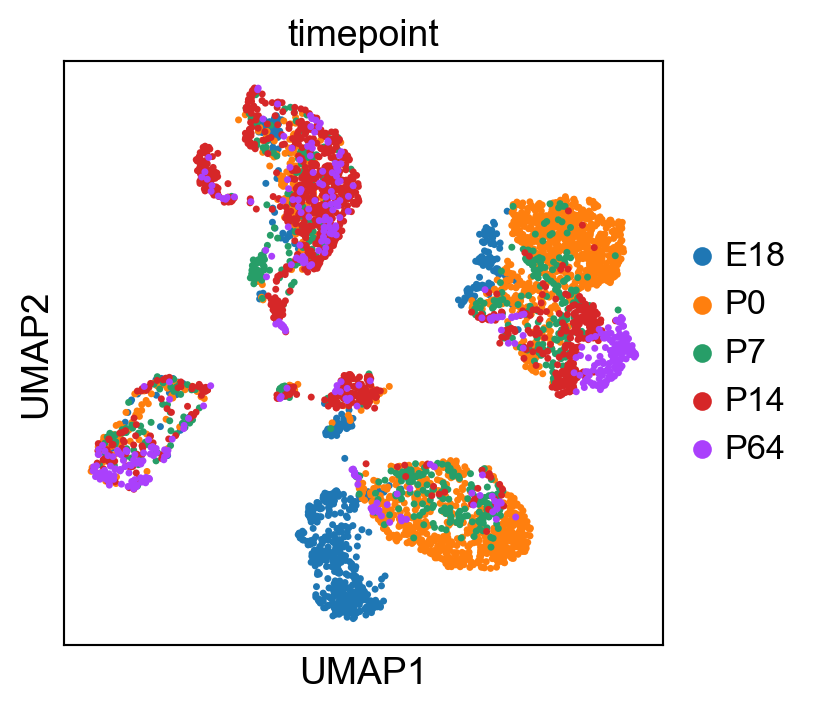

In [4]:
sc.tl.pca(epithelial, svd_solver='arpack')
sc.pp.neighbors(epithelial, n_neighbors=10, n_pcs=12)
sc.tl.umap(epithelial)
sc.pl.umap(epithelial, color=['timepoint'])

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	'distances', weighted adjacency matrix
	'connectivities', weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


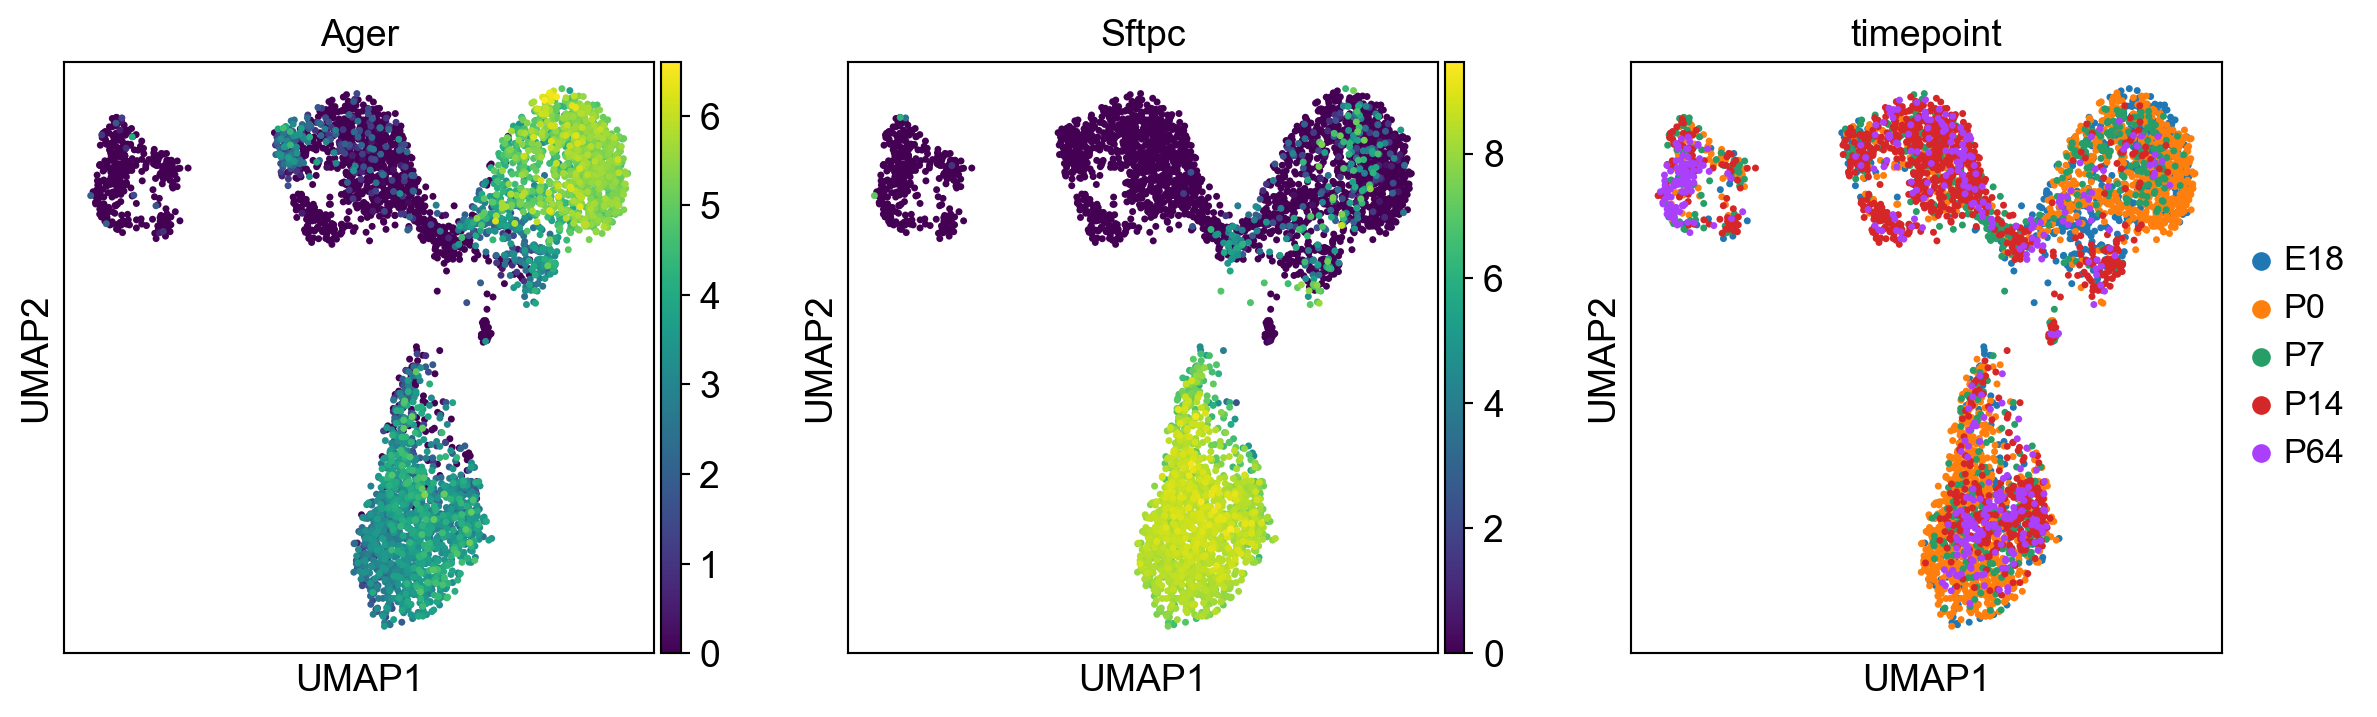

In [5]:
#integrate
sc.external.pp.bbknn(epithelial, batch_key='library')  

sc.tl.umap(epithelial)
sc.pl.umap(epithelial, color=['Ager', 'Sftpc', 'timepoint'])

running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


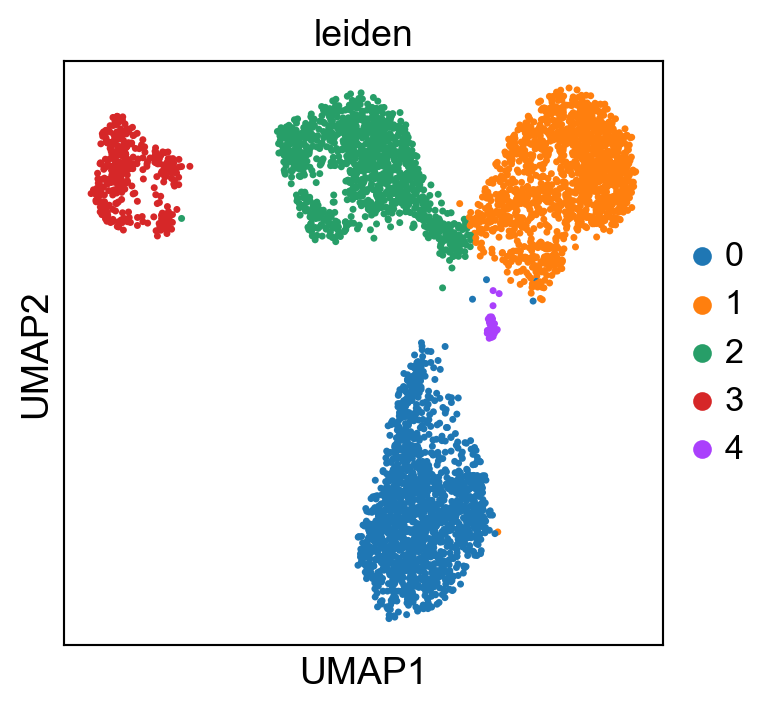

In [6]:
sc.tl.leiden(epithelial, resolution=0.2)
sc.pl.umap(epithelial, color = ['leiden'])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)


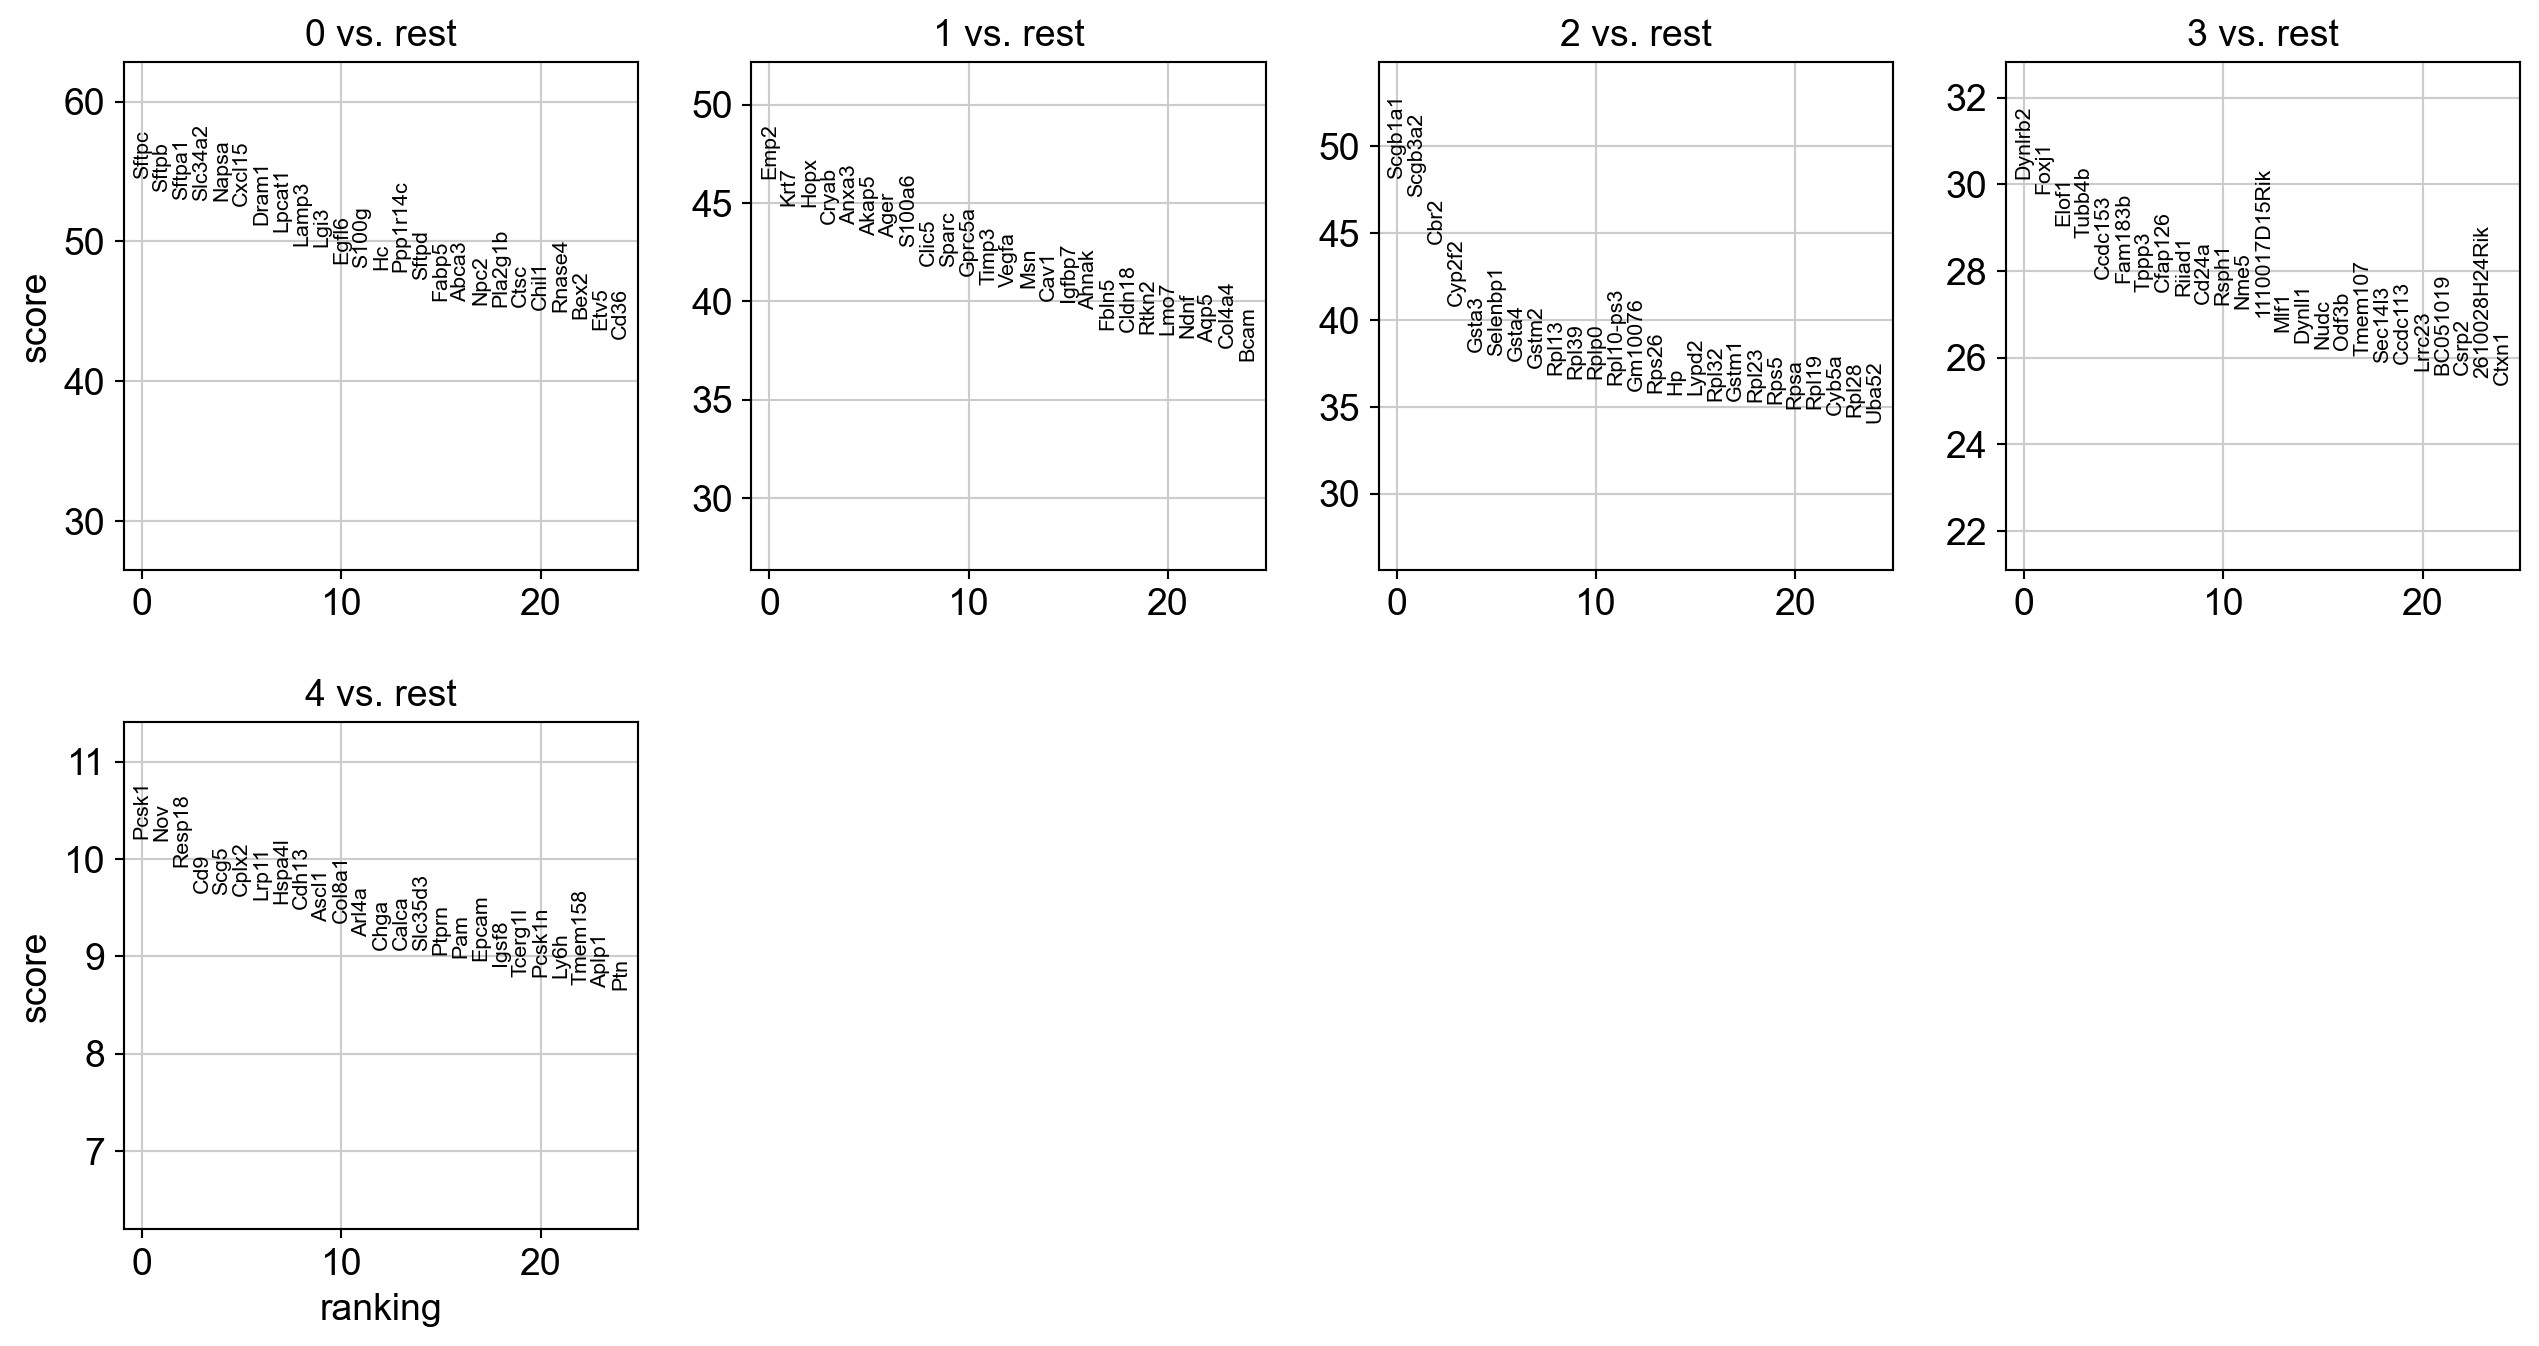

In [7]:
sc.tl.rank_genes_groups(epithelial, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(epithelial, n_genes=25, sharey=False)

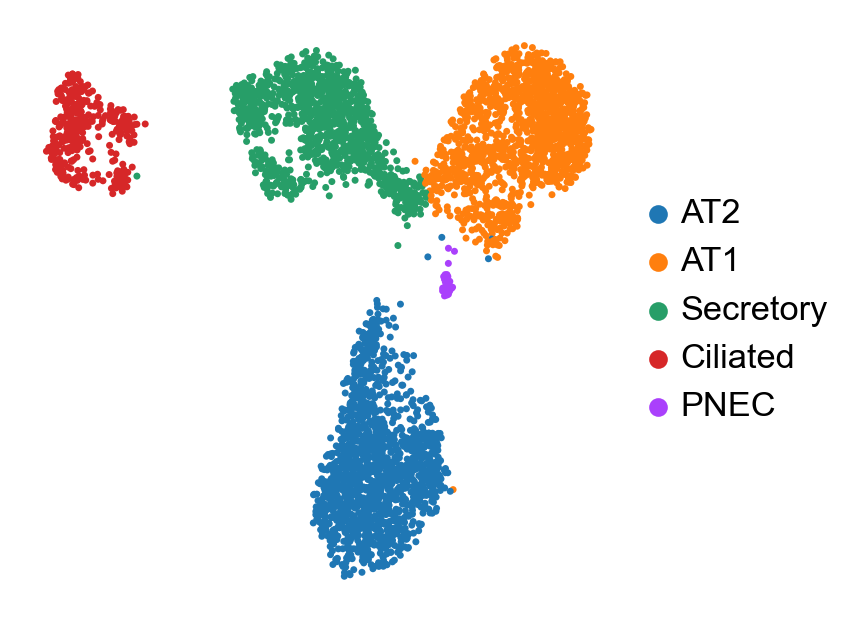

In [10]:
new_cluster_names =[
    'AT2',
    'AT1',
    'Secretory',
    'Ciliated',
    'PNEC']

epithelial.rename_categories('leiden', new_cluster_names)
sc.pl.umap(epithelial, color = ['leiden'], frameon=False, title='')

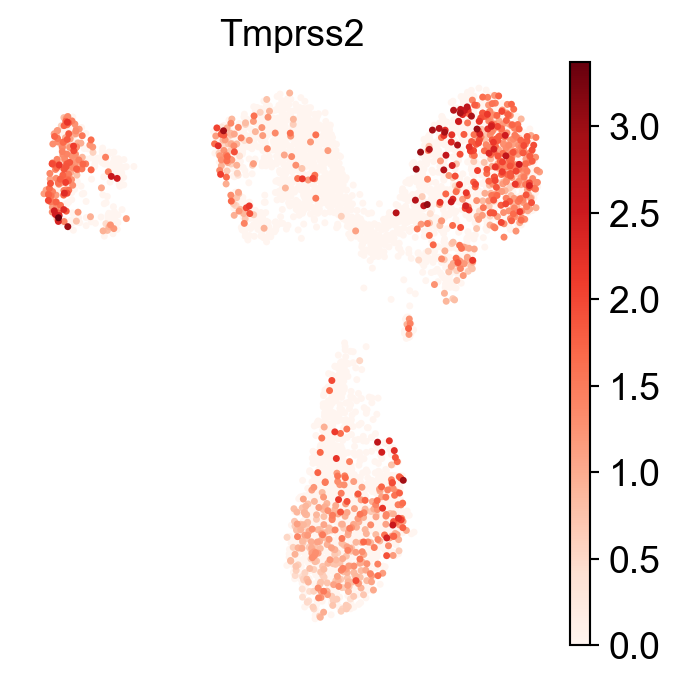

In [11]:
sc.pl.umap(epithelial, color = ['Tmprss2'], frameon=False, title='Tmprss2', color_map='Reds')

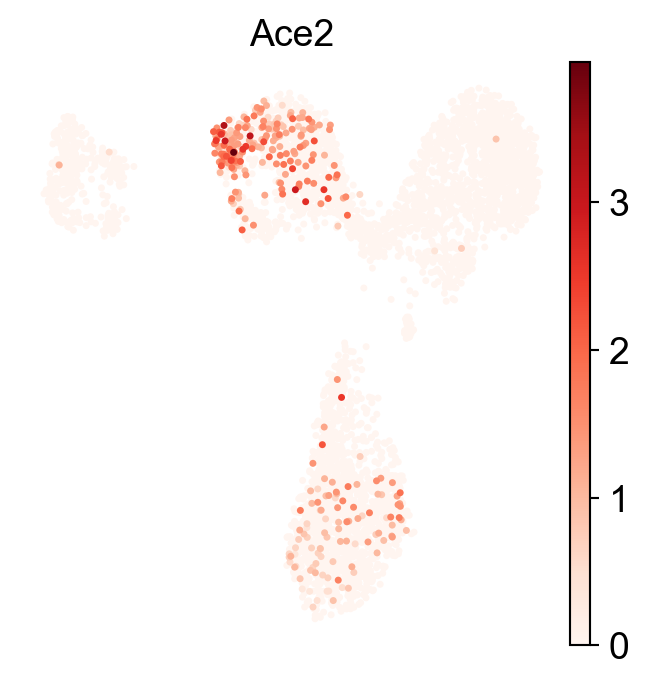

In [12]:
sc.pl.umap(epithelial, color = ['Ace2'], frameon=False, title='Ace2', color_map='Reds')

In [13]:
at1 = epithelial[epithelial.obs['leiden'].isin(['AT1'])]
at2 = epithelial[epithelial.obs['leiden'].isin(['AT2'])]
secretory = epithelial[epithelial.obs['leiden'].isin(['Secretory'])]
ciliated = epithelial[epithelial.obs['leiden'].isin(['Ciliated'])]

In [24]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 4,2

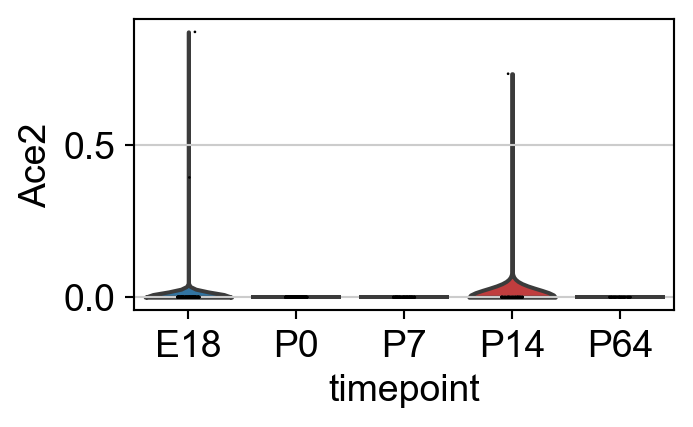

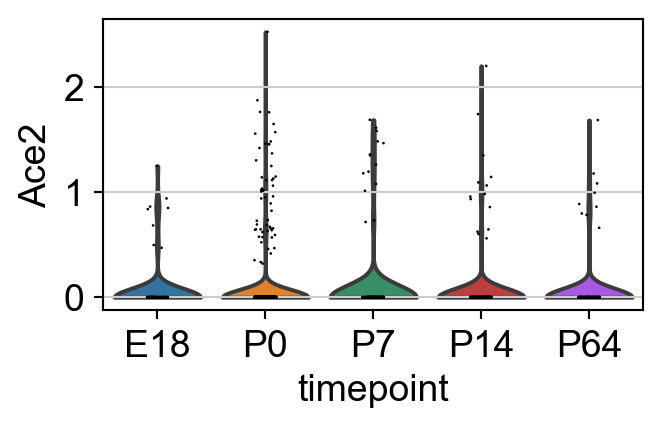

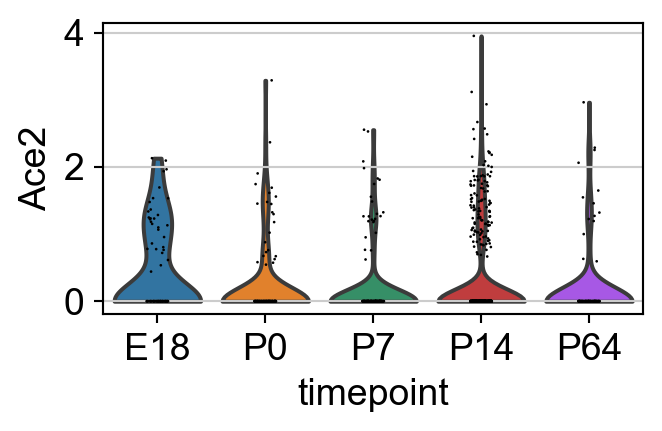

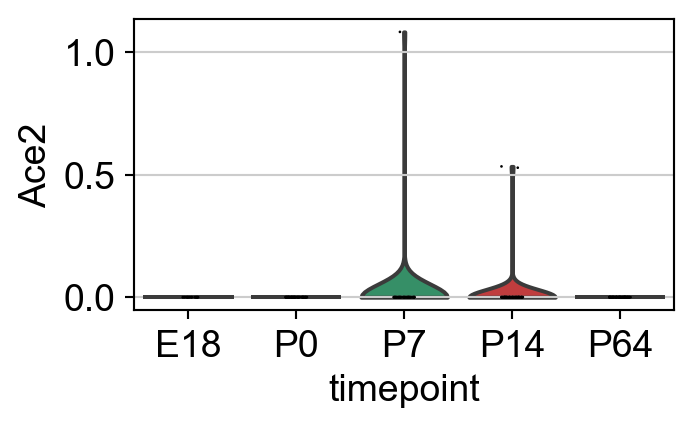

In [25]:
ax = sc.pl.violin(at1, ['Ace2'], groupby='timepoint', swapaxes=True)
ax = sc.pl.violin(at2, ['Ace2'], groupby='timepoint', swapaxes=True)
ax = sc.pl.violin(secretory, ['Ace2'], groupby='timepoint', swapaxes=True)
ax = sc.pl.violin(ciliated, ['Ace2'], groupby='timepoint', swapaxes=True)

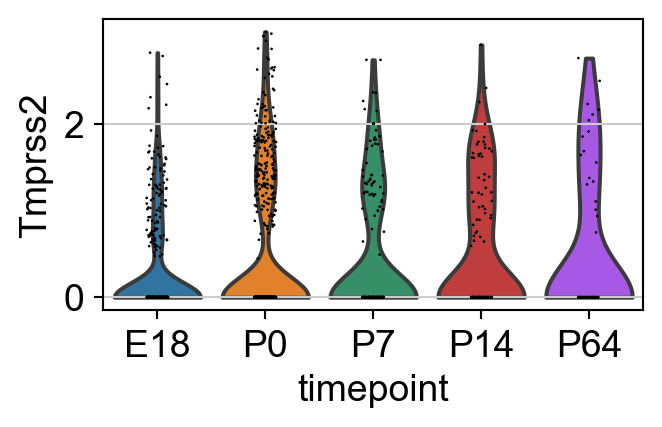

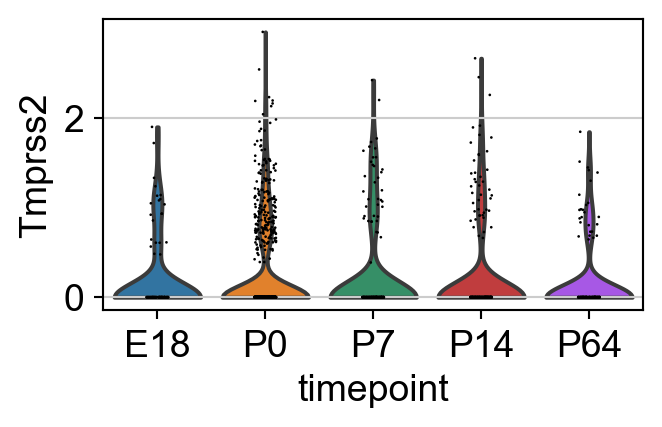

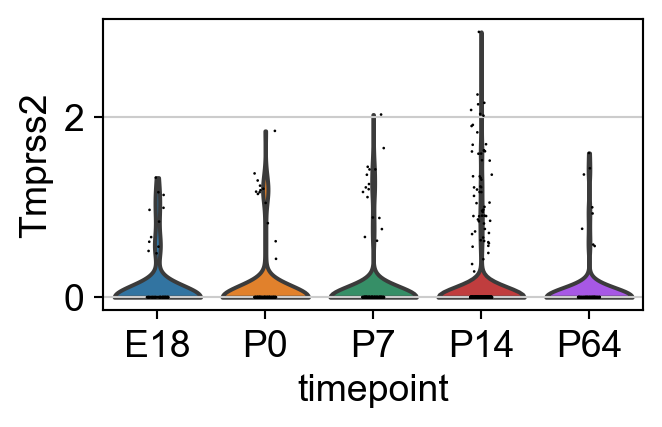

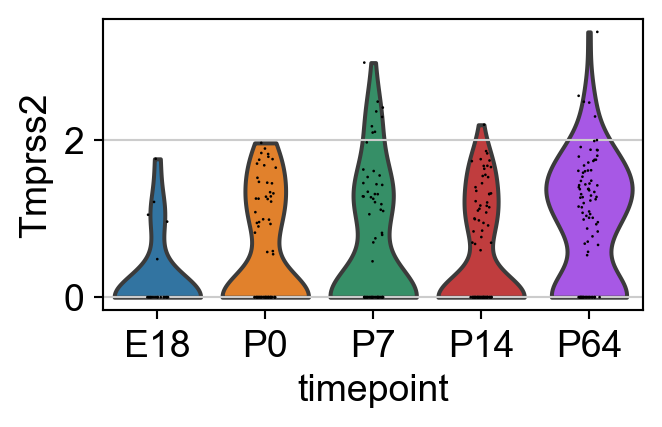

In [26]:
ax = sc.pl.violin(at1, ['Tmprss2'], groupby='timepoint', swapaxes=True)
ax = sc.pl.violin(at2, ['Tmprss2'], groupby='timepoint', swapaxes=True)
ax = sc.pl.violin(secretory, ['Tmprss2'], groupby='timepoint', swapaxes=True)
ax = sc.pl.violin(ciliated, ['Tmprss2'], groupby='timepoint', swapaxes=True)

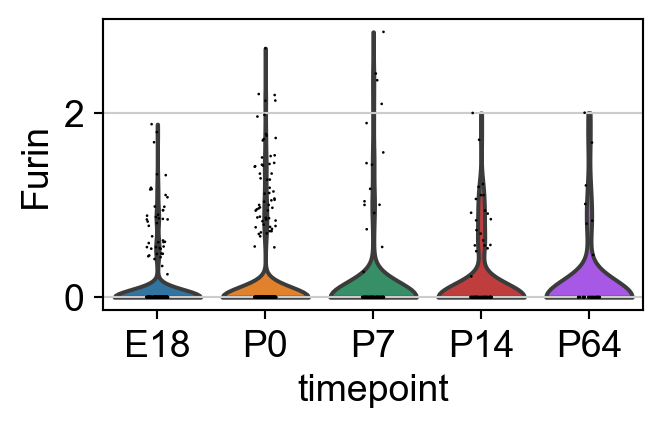

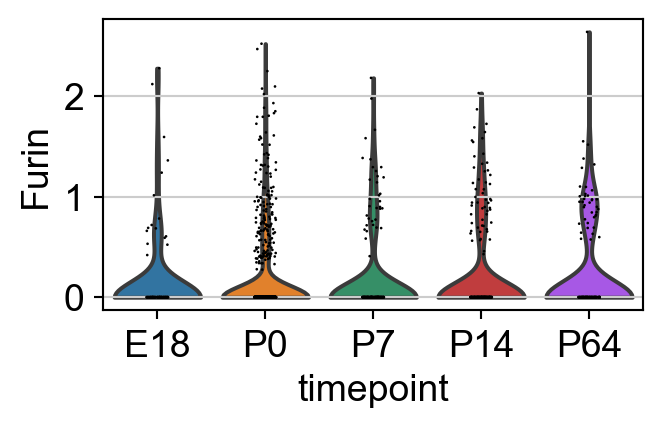

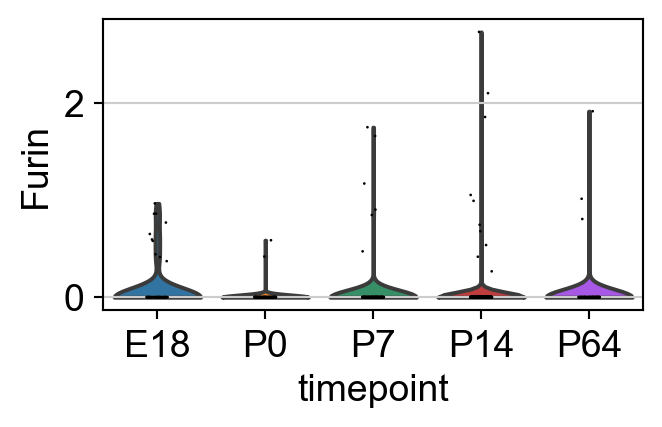

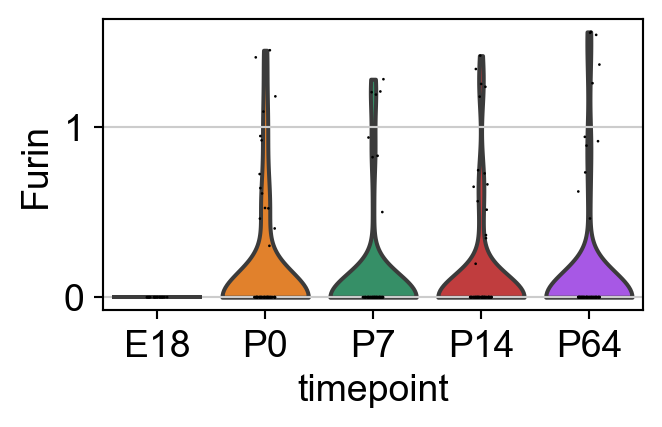

In [27]:
ax = sc.pl.violin(at1, ['Furin'], groupby='timepoint', swapaxes=True)
ax = sc.pl.violin(at2, ['Furin'], groupby='timepoint', swapaxes=True)
ax = sc.pl.violin(secretory, ['Furin'], groupby='timepoint', swapaxes=True)
ax = sc.pl.violin(ciliated, ['Furin'], groupby='timepoint', swapaxes=True)

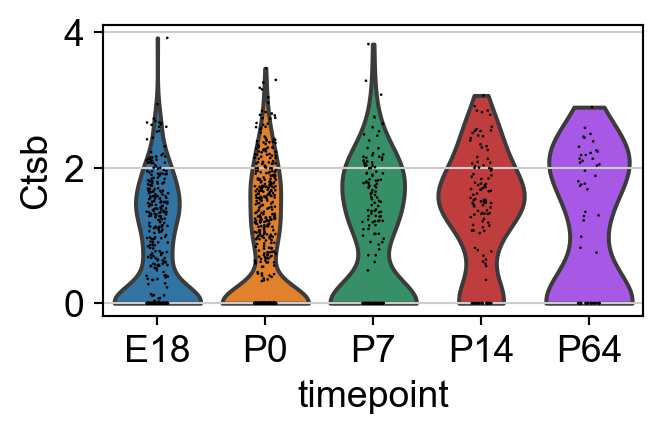

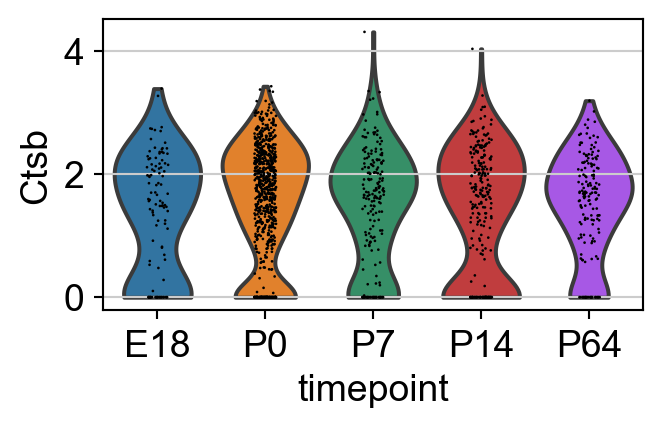

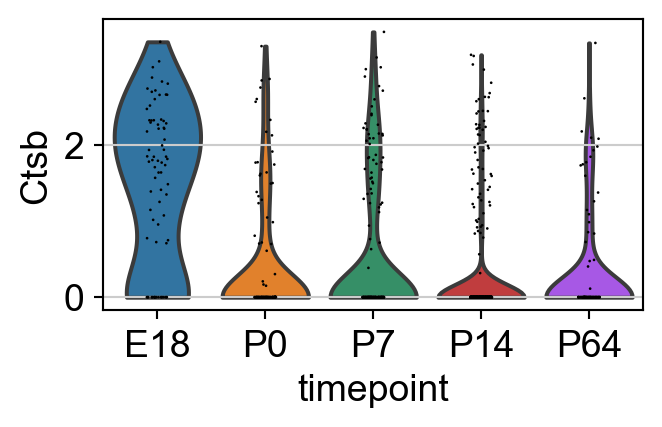

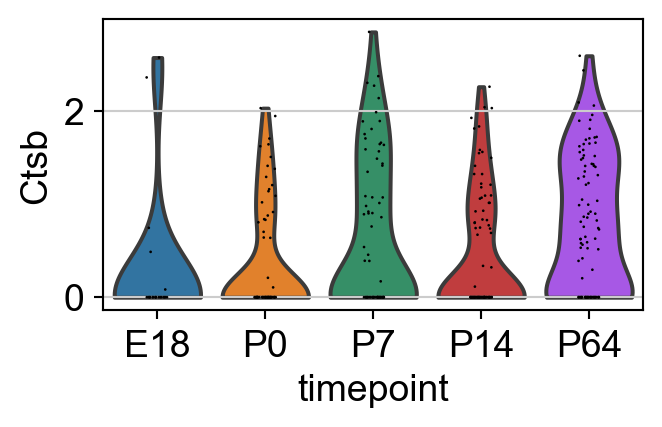

In [28]:
ax = sc.pl.violin(at1, ['Ctsb'], groupby='timepoint', swapaxes=True)
ax = sc.pl.violin(at2, ['Ctsb'], groupby='timepoint', swapaxes=True)
ax = sc.pl.violin(secretory, ['Ctsb'], groupby='timepoint', swapaxes=True)
ax = sc.pl.violin(ciliated, ['Ctsb'], groupby='timepoint', swapaxes=True)

In [29]:
results_file = ('./epithelial_recluster.h5ad')
epithelial.write(results_file)